In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)          

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.200d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.50d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.100d.txt
/kaggle/input/google-quest-challenge/sample_submission.csv
/kaggle/input/google-quest-challenge/train.csv
/kaggle/input/google-quest-challenge/test.csv


## Standard Neural Networks with Static Semantic Embeddings Baseline


<img src="https://miro.medium.com/max/688/1*zR61FG9RUd6ul4ecXA_euQ.jpeg">


In this context, we will be building a preliminary deep model using sophisticated neural networks and variants of RNNs. We will be building a simple LSTM model for validating the influence of deep models with respect to the statistical ones. In the first case, we will be using the Keras Embedding layer and visualize the results before using the embedding models.

[Keras LSTM](https://keras.io/api/layers/recurrent_layers/lstm/)
[Keras](https://keras.io/)
[Keras Starter Guides](https://keras.io/examples/nlp/)
[Tensorflow Starter](https://www.tensorflow.org/tutorials/keras/text_classification)
[Tensorflow Hub](https://www.tensorflow.org/tutorials/keras/text_classification_with_hub)
[Jason's Blog-Best practises](https://machinelearningmastery.com/best-practices-document-classification-deep-learning/)
[Jason's Blog-Convolution Networks](https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/)


More resources will be provided, and for now we will be focussing on creating specific  RNN (Recurrent Neural Variants) with/without Static Semantic Embeddings to create a Neural Model Baseline. 


<img src="https://miro.medium.com/max/875/1*n-IgHZM5baBUjq0T7RYDBw.gif">


### Recurrent Neural Networks

Recurrent neural networks (RNN) are a class of neural networks that is powerful for modeling sequence data such as time series or natural language.

Schematically, a RNN layer uses a for loop to iterate over the timesteps of a sequence, while maintaining an internal state that encodes information about the timesteps it has seen so far.

The Keras RNN API is designed with a focus on:

- Ease of use: the built-in keras.layers.RNN, keras.layers.LSTM, keras.layers.GRU layers enable you to quickly build recurrent models without having to make difficult configuration choices.

- Ease of customization: You can also define your own RNN cell layer (the inner part of the for loop) with custom behavior, and use it with the generic keras.layers.RNN layer (the for loop itself). This allows you to quickly prototype different research ideas in a flexible way with minimal code.


A classic RNN appears as follows:

<img src="https://miro.medium.com/max/627/1*go8PHsPNbbV6qRiwpUQ5BQ.png">

This [video](https://youtu.be/8HyCNIVRbSU) provides a good description of how RNNs work.


Particulary a RNN works on the logic:


<img src="https://miro.medium.com/max/875/1*3mDe6V5DRXqpHYKDfxN4Rg.png">


There are various kinds of such networks:


- Encoding Recurrent Neural Networks are just folds. They’re often used to allow a neural network to take a variable length list as input, for example taking a sentence as input.


<img src="https://colah.github.io/posts/2015-09-NN-Types-FP/img/RNN-encoding.png">


- Generating Recurrent Neural Networks are just unfolds. They’re often used to allow a neural network to produce a list of outputs, such as words in a sentence.


<img src="https://colah.github.io/posts/2015-09-NN-Types-FP/img/RNN-generating.png">


- General Recurrent Neural Networks are accumulating maps. They’re often used when we’re trying to make predictions in a sequence. For example, in voice recognition, we might wish to predict a phenome for every time step in an audio segment, based on past context.


<img src="https://colah.github.io/posts/2015-09-NN-Types-FP/img/RNN-general.png">


- Bidirectional Recursive Neural Networks are a more obscure variant, which I mention primarily for flavor. In functional programming terms, they are a left and a right accumulating map zipped together. They’re used to make predictions over a sequence with both past and future context.

<img src="https://colah.github.io/posts/2015-09-NN-Types-FP/img/RNN-bidirectional.png">

 
 
Some resources for understanding the derivatives and optimization inside the RNNs:

- [Maths](https://www.cs.toronto.edu/~tingwuwang/rnn_tutorial.pdf)
- [Blog](https://colah.github.io/posts/2015-09-NN-Types-FP/)
- [Blog](https://towardsdatascience.com/under-the-hood-of-neural-networks-part-2-recurrent-af091247ba78)
- [Kernel](https://www.kaggle.com/abhilash1910/nlp-workshop-ml-india#Neural-Networks)


These are some starter resources for creating preliminary networks for sentiment analysis, text/intent classifications. There will be some advanced architectures which will be focussed later.


### Long Short Term Memory (LSTM)

[Drawbacks of RNNS](https://colah.github.io/posts/2015-08-Understanding-LSTMs/): One of the appeals of RNNs is the idea that they might be able to connect previous information to the present task, such as using previous video frames might inform the understanding of the present frame. If RNNs could do this, they’d be extremely useful. But can they? It depends.Sometimes, we only need to look at recent information to perform the present task. For example, consider a language model trying to predict the next word based on the previous ones. If we are trying to predict the last word in “the clouds are in the sky,” we don’t need any further context – it’s pretty obvious the next word is going to be sky. In such cases, where the gap between the relevant information and the place that it’s needed is small, RNNs can learn to use the past information.But there are also cases where we need more context. Consider trying to predict the last word in the text “I grew up in France… I speak fluent French.” Recent information suggests that the next word is probably the name of a language, but if we want to narrow down which language, we need the context of France, from further back. It’s entirely possible for the gap between the relevant information and the point where it is needed to become very large.
Unfortunately, as that gap grows, RNNs become unable to learn to connect the information.In theory, RNNs are absolutely capable of handling such “long-term dependencies.” A human could carefully pick parameters for them to solve toy problems of this form. Sadly, in practice, RNNs don’t seem to be able to learn them. The problem was explored in depth by Hochreiter (1991) [German] and Bengio, et al. (1994), who found some pretty fundamental reasons why it might be difficult.
Thankfully, LSTMs don’t have this problem!

- LSTMs:
 
 <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png">
 
 The first step in our LSTM is to decide what information we’re going to throw away from the cell state. This decision is made by a sigmoid layer called the “forget gate layer.” It looks at ```ht−1``` and ```xt```, and outputs a number between 0 and 1 for each number in the cell state ```Ct−1```. A 1 represents “completely keep this” while a 0 represents “completely get rid of this.”

Let’s go back to our example of a language model trying to predict the next word based on all the previous ones. In such a problem, the cell state might include the gender of the present subject, so that the correct pronouns can be used. When we see a new subject, we want to forget the gender of the old subject.

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-f.png">


The next step is to decide what new information we’re going to store in the cell state. This has two parts. First, a sigmoid layer called the “input gate layer” decides which values we’ll update. Next, a tanh layer creates a vector of new candidate values, ```C~t```, that could be added to the state. In the next step, we’ll combine these two to create an update to the state.

In the example of our language model, we’d want to add the gender of the new subject to the cell state, to replace the old one we’re forgetting.

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-i.png">

It’s now time to update the old cell state, ```Ct−1```, into the new cell state ```Ct```. The previous steps already decided what to do, we just need to actually do it.

We multiply the old state by ```ft```, forgetting the things we decided to forget earlier. Then we add ```it∗C~t```. This is the new candidate values, scaled by how much we decided to update each state value.

In the case of the language model, this is where we’d actually drop the information about the old subject’s gender and add the new information, as we decided in the previous steps.

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-C.png">

Finally, we need to decide what we’re going to output. This output will be based on our cell state, but will be a filtered version. First, we run a sigmoid layer which decides what parts of the cell state we’re going to output. Then, we put the cell state through tanh (to push the values to be between −1 and 1) and multiply it by the output of the sigmoid gate, so that we only output the parts we decided to.

For the language model example, since it just saw a subject, it might want to output information relevant to a verb, in case that’s what is coming next. For example, it might output whether the subject is singular or plural, so that we know what form a verb should be conjugated into if that’s what follows next.

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-o.png">


An illustrated working of the LSTM is provided:


<img src="https://miro.medium.com/max/1900/1*GjehOa513_BgpDDP6Vkw2Q.gif">


Some blogs:

- [Blog](https://www.google.com/url?sa=i&url=https%3A%2F%2Ftowardsdatascience.com%2Fillustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21&psig=AOvVaw3GJ2-g9jyCgtlUxlTAmyJ8&ust=1608535825759000&source=images&cd=vfe&ved=0CA0QjhxqFwoTCLjax4eF3O0CFQAAAAAdAAAAABAD)
- [Blog](https://www.analyticsvidhya.com/blog/2017/12/fundamentals-of-deep-learning-introduction-to-lstm/)
- [Blog](https://machinelearningmastery.com/gentle-introduction-long-short-term-memory-networks-experts/)
- [Paper](https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/43905.pdf)

There are several Variants of LSTMs some of the most famous being Depth GRU /Gated Recurrent Units:

A slightly more dramatic variation on the LSTM is the Gated Recurrent Unit, or GRU, introduced by Cho, et al. (2014). It combines the forget and input gates into a single “update gate.” It also merges the cell state and hidden state, and makes some other changes. The resulting model is simpler than standard LSTM models, and has been growing increasingly popular.

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-GRU.png">




In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM, Dense,Flatten,Conv2D,Conv1D,GlobalMaxPooling1D,GlobalMaxPool1D
from keras.optimizers import Adam
import numpy as np  
import pandas as pd 
import keras.backend as k
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional,GRU
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

In [4]:
train_df=pd.read_csv('../input/google-quest-challenge/train.csv')

<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1186%2Fs12859-019-3079-8/MediaObjects/12859_2019_3079_Fig2_HTML.png">


A proper model overview comprising of LSTMs and Embeddings is provided here:

<img src="https://d3i71xaburhd42.cloudfront.net/6ac8328113639044d2beb83246b9d07f513ac6c8/3-Figure1-1.png">

Some resources:

- [Kernels](https://www.kaggle.com/rajmehra03/a-detailed-explanation-of-keras-embedding-layer)
- [Kernels](https://www.kaggle.com/christofhenkel/how-to-preprocessing-when-using-embeddings)


In [5]:
##First Step is to test model performance without pretrained Embeddings
## Will be using only Keras Embeddings in this case with a minimal neural network model

maxlen=1000
max_features=5000 
embed_size=300

#clean some null words or use the previously cleaned & lemmatized corpus
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
label_y= LabelEncoder()
labels=label_y.fit_transform(train_df['category'][:2000])
labels
train_y=labels
train_x,test_x,train_y,test_y=train_test_split(train_df['question_body'][:2000],train_y,test_size=0.2,random_state=42)

val_x=test_x
#Tokenizing steps- must be remembered
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_x))
train_x=tokenizer.texts_to_sequences(train_x)
val_x=tokenizer.texts_to_sequences(val_x)

#Pad the sequence- To allow same length for all vectorized words
train_x=pad_sequences(train_x,maxlen=maxlen)
val_x=pad_sequences(val_x,maxlen=maxlen)
val_y=test_y
print("Padded and Tokenized Training Sequence".format(),train_x.shape)
print("Target Values Shape".format(),train_y.shape)
print("Padded and Tokenized Training Sequence".format(),val_x.shape)
print("Target Values Shape".format(),val_y.shape)

Padded and Tokenized Training Sequence (1600, 1000)
Target Values Shape (1600,)
Padded and Tokenized Training Sequence (400, 1000)
Target Values Shape (400,)


In [6]:
model=Sequential()
model.add(Embedding(max_features,embed_size,input_length=maxlen))
model.add(LSTM(60))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
plot_model(
    model,
    to_file="simple_model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)
model.fit(train_x,train_y,batch_size=512,epochs=3,verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 300)         1500000   
_________________________________________________________________
lstm (LSTM)                  (None, 60)                86640     
_________________________________________________________________
dense (Dense)                (None, 16)                976       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,587,633
Trainable params: 1,587,633
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
4/4 - 5s - loss: 0.6729 - accuracy: 0.1306
Epoch 2/3
4/4 - 1s - loss: 0.4573 - accuracy: 0.1219
Epoch 3/3
4/4 - 1s - loss: -2.5374e-02 - accuracy: 0.1219


In [7]:
from PIL import Image 
import matplotlib.pyplot as plt
im = Image.open("simple_model.png") 
im.show()
plt.show()

## Build a Static Semantic Embedding Neural Network(LSTM) Baseline

In this case, we will be using pretrained embeddings for ouruse case. 
Particularly this lines of code:

```python
from keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
maxlen=1000
max_features=5000 
embed_size=300

train_sample=train_df['review']

#Tokenizing steps- must be remembered
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_sample))
train_sample=tokenizer.texts_to_sequences(train_sample)

#Pad the sequence- To allow same length for all vectorized words
train_sample=pad_sequences(train_sample,maxlen=maxlen)



EMBEDDING_FILE = '../input/wikinews300d1msubwordvec/wiki-news-300d-1M-subword.vec'
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE) if len(o)>100)

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector
plt.plot(embedding_matrix[20])
plt.show()
```

In [8]:
##Build Static Embedding on top of a Neural Model

from keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
maxlen=1000
max_features=5000 
embed_size=300

train_sample=train_df['question_body'][3000:4000]

#Tokenizing steps- must be remembered
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_sample))
train_sample=tokenizer.texts_to_sequences(train_sample)

#Pad the sequence- To allow same length for all vectorized words
train_sample=pad_sequences(train_sample,maxlen=maxlen)



EMBEDDING_FILE = '../input/glove-global-vectors-for-word-representation/glove.6B.50d.txt'
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE) if len(o)>100)

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

inp=Input(shape=(maxlen,))
z=Embedding(max_features,embed_size,weights=[embedding_matrix])(inp)
z=Bidirectional(LSTM(60,return_sequences='True'))(z)
z=GlobalMaxPool1D()(z)
z=Dense(16,activation='relu')(z)
z=Dense(1,activation='softmax')(z)
model=Model(inputs=inp,outputs=z)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
plot_model(
    model,
    to_file="glove_simple_model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

model.fit(train_x,train_y,batch_size=128,epochs=3,verbose=2,validation_data=(val_x,val_y))

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1000)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1000, 50)          250000    
_________________________________________________________________
bidirectional (Bidirectional (None, 1000, 120)         53280     
_________________________________________________________________
global_max_pooling1d (Global (None, 120)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1936      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 305,233
Trainable params: 305,233
Non-trainable params: 0
_______________________________________________________

References for now:
- [Kernel](https://www.kaggle.com/colearninglounge/nlp-model-building-transformers-attention-more)

## Model Performance

We see that the model performance based on Question and Category baseline with pretrained glove embeddings is quite low, and this is due to the fact that the dataset is not appropriately cleared. The semantics taken into consideration by taking a feature size of 5000 tokens is not sufficient to identify and categorize the questions based on the categories. This is an example where previously stated Graph Embeddings space outperform the traditional LSTMs for infering accurate information.

# Reference Notebook

All the materials of this notebook is taken from this [notebook](https://www.kaggle.com/abhilash1910/nlp-workshop-playing-with-transformers) as pre-requisites , and only the major ones are taken.
It is recommended to study the notebook (also added here) , for further enhanced concepts.
Everything under this section is taken from the aforementioned notebook.

# Understanding Attention Mechanism

[Attention mechanism](https://arxiv.org/abs/1706.03762) is the most important aspect in language modelling. There are many variants of attention such as Bahdanau Attention, Luong Attention, Dot Product Attention,Self Attention. A detailed description of the attention mechanism is provided in this [kernel](https://www.kaggle.com/colearninglounge/nlp-end-to-end-cll-nlp-workshop-2)


## Bahdanau Attention


<img src="https://miro.medium.com/max/639/1*qhOlQHLdtfZORIXYuoCtaA.png">


Bahdanau et al. proposed an attention mechanism that learns to align and translate jointly. It is also known as Additive attention as it performs a linear combination of encoder states and the decoder states.

let’s understand the Attention mechanism suggested by Bahdanau

All hidden states of the encoder(forward and backward) and the decoder are used to generate the context vector, unlike how just the last encoder hidden state is used in seq2seq without attention.
The attention mechanism aligns the input and output sequences, with an alignment score parameterized by a feed-forward network. It helps to pay attention to the most relevant information in the source sequence.
The model predicts a target word based on the context vectors associated with the source position and the previously generated target words.
Alignment Score
The alignment score maps how well the inputs around position “j” and the output at position “i” match. The score is based on the previous decoder’s hidden state, s₍ᵢ₋₁₎ just before predicting the target word and the hidden state, hⱼ of the input sentence.


<img src="https://miro.medium.com/max/535/1*u2YdTRPjN34Fpr-zxvoJsg.png">


The decoder decides which part of the source sentence it needs to pay attention to, instead of having encoder encode all the information of the source sentence into a fixed-length vector. The alignment vector that has the same length with the source sequence and is computed at every time step of the decode.

Attention Weights
We apply a softmax activation function to the alignment scores to obtain the attention weights.


<img src="https://miro.medium.com/max/685/1*3aCyU9aSVHvxzOwvQdExdQ.png">




<img src="https://www.tensorflow.org/images/seq2seq/attention_mechanism.jpg">

<img src="https://www.tensorflow.org/images/seq2seq/attention_equation_0.jpg">




## Luong Attention




### Global Attention


<img src="https://miro.medium.com/max/626/1*LhEapXF1mtaB3rDgIjcceg.png">

Luong, et al., 2015 proposed the “global” and “local” attention. The global attention is similar to the soft attention, while the local one is an interesting blend between hard and soft, an improvement over the hard attention to make it differentiable: the model first predicts a single aligned position for the current target word and a window centered around the source position is then used to compute a context vector.

The commonality between Global and Local attention

- At each time step t, in the decoding phase, both approaches, global and local attention, first take the hidden state hₜ at the top layer of a stacking LSTM as an input.
- The goal of both approaches is to derive a context vector 𝒸ₜ to capture relevant source-side information to help predict the current target word yₜ
- Attentional vectors are fed as inputs to the next time steps to inform the model about past alignment decisions.
- Global and local attention models differ in how the context vector 𝒸ₜ is derived
- Before we discuss the global and local attention, let’s understand the conventions used by Luong’s attention mechanism for any given time t

   - 𝒸ₜ : context vector
   - aₜ : alignment vector
   - hₜ : current target hidden state
   - hₛ : current source hidden state
   - yₜ: predicted current target word
   - h˜ₜ : Attentional vectors
   
   
The global attentional model considers all the hidden states of the encoder when calculating the context vector 𝒸ₜ.

A variable-length alignment vector aₜ equal to the size of the number of time steps in the source sequence is derived by comparing the current target hidden state hₜ with each of the source hidden state hₛ
The alignment score is referred to as a content-based function for which we consider three different alternatives


### Local Attention


<img src="https://miro.medium.com/max/538/1*YXjdGl3CnSfHfzYpQiObgg.png">



- Local attention only focuses on a small subset of source positions per target words unlike the entire source sequence as in global attention
- Computationally less expensive than global attention
- The local attention model first generates an aligned position Pₜ for each target word at time t.
- The context vector 𝒸ₜ is derived as a weighted average over the set of source hidden states within selected the window
- The aligned position can be monotonically or predictively selected


### Formulation


<img src="https://miro.medium.com/max/875/1*_Ta67S8_lXTbVzJMztkxKg.png">



## List of Different Attention Mechanisms


<img src="https://theaisummer.com/assets/img/posts/attention/attention-calculation.png">


## Resources:

- [Luong Paper](https://arxiv.org/abs/1508.04025)
- [Bahdanau Paper](https://arxiv.org/abs/1409.0473)
- [Luong 2015](http://papers.nips.cc/paper/7181-attention-is-all-you-need.pdf)
- [Kernel](https://www.kaggle.com/colearninglounge/nlp-end-to-end-cll-nlp-workshop-2)

In [9]:
#Implementing Different Attention Layers for our keras model
import math
class Bahdanau_Attention_1D(tf.keras.layers.Layer):
    #A class for Bahdanau Attention
    def __init__(self,units):
        super(Bahdanau_Attention_1D,self).__init__()
        self.units=units
        self.Wq=tf.keras.layers.Dense(self.units)
        self.Wk=tf.keras.layers.Dense(self.units)
        self.Wv=tf.keras.layers.Dense(60)
        
    def call(self,q):
        self.q=q
        self.v=q
#         print(self.q.shape)
        q_t=tf.expand_dims(self.q,1)
        score=self.Wv(tf.nn.tanh(self.Wq(self.q)+self.Wk(self.v)))
        attention_wts=tf.nn.softmax(score,axis=1)
#         print(attention_wts.shape)
        context_vector=(attention_wts*self.v)
#         context_vector=tf.reduce_sum(context_vector,axis=1)
#         print(context_vector.shape)
        return context_vector,attention_wts




class Luong_Attention_1D(tf.keras.layers.Layer):
    #A class for Luong Attention
    def __init__(self,units):
        super(Luong_Attention_1D,self).__init__()
        self.units=units
        self.Wq=tf.keras.layers.Dense(self.units)
        self.Wk=tf.keras.layers.Dense(self.units)
        self.Wv=tf.keras.layers.Dense(60)
        
    def call(self,q):
        self.q=q
        self.v=q
#         print(self.q.shape)
        q_t=tf.expand_dims(self.q,1)
#         self.q=tf.transpose(self.q)
        score=(self.q)*(self.v)
        attention_wts=tf.nn.softmax(score,axis=1)
#         print(attention_wts.shape)
        context_vector=(attention_wts*self.v)
#         context_vector=tf.reduce_sum(context_vector,axis=1)
#         print(context_vector.shape)
        return context_vector,attention_wts

class Scaled_Dot_Product_Attention_1D(tf.keras.layers.Layer):
    #Scaled dot product Attention
    def __init__(self,units):
        super(Scaled_Dot_Product_Attention_1D,self).__init__()
        self.units=units
        self.Wq=tf.keras.layers.Dense(self.units)
        self.Wk=tf.keras.layers.Dense(self.units)
        self.Wv=tf.keras.layers.Dense(60)
        
    def call(self,q,n):
        self.q=q
        self.v=q
        self.n=n
#         print(self.q.shape)
        q_t=tf.expand_dims(self.q,1)
#         self.q=tf.transpose(self.q)
        score=((self.q)*(self.v))/math.sqrt(self.n)
        attention_wts=tf.nn.softmax(score,axis=1)
#         print(attention_wts.shape)
        context_vector=(attention_wts*self.v)
#         context_vector=tf.reduce_sum(context_vector,axis=1)
#         print(context_vector.shape)
        return context_vector,attention_wts


In [10]:
#Important parameters when using without pretrained embeddings
maxlen=1000
max_features=5000 
embed_size=768


#Desing a simple model
#Layers:
#1.Input
#2.Embedding
#3.Simple LSTM- With Bidirectionality to increase efficiency
#4.Attention- Applying 1D attention
#5.GlobalMaxPooling (optional)
#6.Dense Layer with Relu activation
#7.Final Dense layer containing the input units = (no of unique labels in the corpus).In this case 5.

inp=Input(shape=(maxlen,))
z=Embedding(max_features,embed_size,input_length=maxlen)(inp)
lstm_cell,_,_=(LSTM(60,return_state='True'))(z)
luong_attention=Luong_Attention_1D(60)
_,attention_weights_h=luong_attention(lstm_cell)
print('attention_weights',attention_weights_h)
z=attention_weights_h
# z=GlobalMaxPool1D()(final_attention_weights)
z=Dense(16,activation='relu')(z)
z=Dense(5,activation='softmax')(z)
model=Model(inputs=inp,outputs=z)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
plot_model(
    model,
    to_file="Simple_LSTM_Luong.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

#Split the training and test datasets
label_y= LabelEncoder()
labels=label_y.fit_transform(train_df['category'])
labels
train_y=labels
# train_y=labels
train_x,test_x,train_y,test_y=train_test_split(train_df['question_body'],train_y,test_size=0.2,random_state=42)
val_x=test_x

# Tokenizing steps- must be remembered
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_x))
train_x=tokenizer.texts_to_sequences(train_x)
val_x=tokenizer.texts_to_sequences(val_x)

#Pad the sequence- To allow same length for all vectorized words
train_x=pad_sequences(train_x,maxlen=maxlen)
val_x=pad_sequences(val_x,maxlen=maxlen)
val_y=test_y
print("Padded and Tokenized Training Sequence".format(),train_x.shape)
print("Target Values Shape".format(),train_y.shape)
print("Padded and Tokenized Training Sequence".format(),val_x.shape)
print("Target Values Shape".format(),val_y.shape)

# Run the model with the dataset with 128 batch size ,10 epochs and validation data.
model.fit(train_x,train_y,batch_size=128,epochs=20,verbose=2,validation_data=(val_x,val_y))

attention_weights KerasTensor(type_spec=TensorSpec(shape=(None, 60), dtype=tf.float32, name=None), name='luong__attention_1d/Softmax:0', description="created by layer 'luong__attention_1d'")
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1000)]            0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 1000, 768)         3840000   
_________________________________________________________________
lstm_2 (LSTM)                [(None, 60), (None, 60),  198960    
_________________________________________________________________
luong__attention_1d (Luong_A ((None, 60), (None, 60))  0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                976       
_________________________________________________________________



## Self Attention Mechanism


Self Attention is a mechanism for specifying the the attention on parts of a sentence to retain more semantic information. Self-attention is the method the Transformer uses to bake the “understanding” of other relevant words into the one we’re currently processing. [Jay's Blog](http://jalammar.github.io/illustrated-transformer/) provide a very good idea of this logic.


<img src="http://jalammar.github.io/images/t/transformer_self-attention_visualization.png">

Three vectors q,k and v (query,key and value) are taken into consideration for computation of the self attention mechanism.The q,k and v are normally of 64 dimensions.


<img src="http://jalammar.github.io/images/t/transformer_self_attention_vectors.png">

The score is calculated by taking the dot product of the query vector with the key vector of the respective word we’re scoring. So if we’re processing the self-attention for the word in position #1, the first score would be the dot product of q1 and k1. The second score would be the dot product of q1 and k2.

<img src="http://jalammar.github.io/images/t/transformer_self_attention_score.png">


The third and forth steps are to divide the scores by 8 (the square root of the dimension of the key vectors used in the paper – 64. This leads to having more stable gradients. There could be other possible values here, but this is the default), then pass the result through a softmax operation. Softmax normalizes the scores so they’re all positive and add up to 1.


<img src="http://jalammar.github.io/images/t/self-attention_softmax.png">


This softmax score determines how much each word will be expressed at this position. Clearly the word at this position will have the highest softmax score, but sometimes it’s useful to attend to another word that is relevant to the current word. The fifth step is to multiply each value vector by the softmax score (in preparation to sum them up). The intuition here is to keep intact the values of the word(s) we want to focus on, and drown-out irrelevant words (by multiplying them by tiny numbers like 0.001, for example). The sixth step is to sum up the weighted value vectors. This produces the output of the self-attention layer at this position (for the first word).

<img src="http://jalammar.github.io/images/t/self-attention-output.png">


The computation process for Self Attention can be regarded as follows:


<img src="http://jalammar.github.io/images/t/self-attention-matrix-calculation-2.png">

In [11]:


class Scaled_Dot_Product_Self_Attention_1D(tf.keras.layers.Layer):
    #A class for Self Attention- 1 Dimension
    def __init__(self,units):
        super(Scaled_Dot_Product_Self_Attention_1D,self).__init__()
        self.units=units
        self.Wq=tf.keras.layers.Dense(self.units)
        self.Wk=tf.keras.layers.Dense(self.units)
        self.Wv=tf.keras.layers.Dense(60)
        
    def call(self,q,n):
        self.q=q
        self.v=q
        self.n=n
        self.k=q
#         print(self.q.shape)
        q_t=tf.expand_dims(self.q,1)
#         self.q=tf.transpose(self.q)
        score=(self.Wq(self.q)*self.Wk(self.k))/math.sqrt(n)
        attention_wts=tf.nn.softmax(score,axis=1)
#         print(attention_wts.shape)
        context_vector=(attention_wts*self.v)
        context_vector=tf.reduce_sum(context_vector,axis=1)
#         print(context_vector.shape)
        return context_vector,attention_wts


class Scaled_Dot_Product_Self_Attention(tf.keras.layers.Layer):
    #A class for Self Attention- Q,K,V dimensions
    def __init__(self,units):
        super(Scaled_Dot_Product_Self_Attention,self).__init__()
        self.units=units
        self.Wq=tf.keras.layers.Dense(self.units)
        self.Wk=tf.keras.layers.Dense(self.units)
        self.Wv=tf.keras.layers.Dense(60)
        
    def call(self,q,k,v,n):
        self.q=q
        self.v=v
        self.n=n
        self.k=k
#         print(self.q.shape)
        q_t=tf.expand_dims(self.q,1)
#         self.q=tf.transpose(self.q)
        score=(self.Wq(self.q)*self.Wk(self.k))/math.sqrt(n)
        attention_wts=tf.nn.softmax(score,axis=1)
#         print(attention_wts.shape)
        context_vector=(attention_wts*self.v)
        context_vector=tf.reduce_sum(context_vector,axis=1)
#         print(context_vector.shape)
        return context_vector,attention_wts


#Important parameters when using without pretrained embeddings
maxlen=1000
max_features=5000 
embed_size=768


#Desing a simple model
#Layers:
#1.Input
#2.Embedding
#3.Simple LSTM- With Bidirectionality to increase efficiency
#4.Attention- Applying 1D attention-Self Attention
#5.GlobalMaxPooling (optional)
#6.Dense Layer with Relu activation
#7.Final Dense layer containing the input units = (no of unique labels in the corpus).In this case 5.

inp=Input(shape=(maxlen,))
z=Embedding(max_features,embed_size,input_length=maxlen)(inp)
Bilstm_cell,_,_=(LSTM(60,return_state='True'))(z)
self_attention=Scaled_Dot_Product_Self_Attention_1D(60)
_,attention_weights_h=self_attention(Bilstm_cell,64)
print('attention_weights',attention_weights_h)
z=attention_weights_h
# z=GlobalMaxPool1D()(final_attention_weights)
z=Dense(16,activation='relu')(z)
z=Dense(5,activation='softmax')(z)
model=Model(inputs=inp,outputs=z)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
plot_model(
    model,
    to_file="Simple_LSTM_Self.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

#Split the training and test datasets
train_y=labels
train_x,test_x,train_y,test_y=train_test_split(train_df['question_body'],train_y,test_size=0.2,random_state=42)
val_x=test_x

#Tokenizing steps- must be remembered
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_x))
train_x=tokenizer.texts_to_sequences(train_x)
val_x=tokenizer.texts_to_sequences(val_x)

#Pad the sequence- To allow same length for all vectorized words
train_x=pad_sequences(train_x,maxlen=maxlen)
val_x=pad_sequences(val_x,maxlen=maxlen)
val_y=test_y
print("Padded and Tokenized Training Sequence".format(),train_x.shape)
print("Target Values Shape".format(),train_y.shape)
print("Padded and Tokenized Training Sequence".format(),val_x.shape)
print("Target Values Shape".format(),val_y.shape)

#Run the model with the dataset with 128 batch size ,10 epochs and validation data.
model.fit(train_x,train_y,batch_size=128,epochs=10,verbose=2,validation_data=(val_x,val_y))


attention_weights KerasTensor(type_spec=TensorSpec(shape=(None, 60), dtype=tf.float32, name=None), name='scaled__dot__product__self__attention_1d/Softmax:0', description="created by layer 'scaled__dot__product__self__attention_1d'")
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1000)]            0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 1000, 768)         3840000   
_________________________________________________________________
lstm_3 (LSTM)                [(None, 60), (None, 60),  198960    
_________________________________________________________________
scaled__dot__product__self__ ((None,), (None, 60))     7320      
_________________________________________________________________
dense_12 (Dense)             (None, 16)                976       
________________________

# Enter Transformers - BERT

We will be working with the [HuggingFace](https://huggingface.co/) repository as it contains all SOTA Transformer models. In this context, it is useful to mention some important resources:

- Transformer Keras(https://keras.io/examples/nlp/text_classification_with_transformer/)
- Kaggle Kernel(https://www.kaggle.com/suicaokhoailang/lstm-attention-baseline-0-652-lb)

However in this case, since we would be using the models just for extracting embeddings or features, it is important to know the intermediate layers which should be chosen. Since Transformer architectures are really huge, (BERT/GPT variants), it is very complicated to fully understand which layer should be extracted for the features. While BERT, the first Transformer, relies on 2 tokens ([CLS] and [SEP]) ,extracting the sentence embedding vectors are done after extracting the last output layer. However , different models have different number of layers, and in this case, we will exploring a model agnostic way to extract sentence embeddings and performing similarity check with all of the models.



<img src="http://jalammar.github.io/images/bert-next-sentence-prediction.png">


## BERT Embeddings

[BERT](https://arxiv.org/abs/1810.04805) is a traditional SOTA transformer architecture published by Google Research which uses bidirectional pretraining . The importance of using BERT is that it has 2 important aspects:

Msked Language Model (MLM)
Next Sentence Prediction(NSP)
The bidirectional pre-training is essentially helpful to be used for any tasks. The Huggingface implementation is helpful for fine-tuning BERT for any language modelling task. The BERT architecture falls under an encoder-decoder(Transformer) model as follows:


<img src="https://miro.medium.com/max/876/0*ViwaI3Vvbnd-CJSQ.png">

<img src="https://d3i71xaburhd42.cloudfront.net/df2b0e26d0599ce3e70df8a9da02e51594e0e992/15-Figure4-1.png">


## Extracting Embeddings from BERT variant Transformers

For finetuning, it is to be kept in mind, there are many ways to do this. We are using BERT from Huggingface repository while it can also be used from [TF-HUB](https://tfhub.dev/s?module-type=text-embedding) or from [Google-Research](https://github.com/google-research/bert) repository. The reason for using HuggingFace is that the same codebase is applicable for all language models. The 3 most important input features that any language model asks for is:

- input_ids
- attention_masks
- token_ids

Let us first try to analyse and understand how BERT tokenizers, and model can be used in this context. The BERT documentation provides an outline of how to use BERT tokenizers and also modify it for downstream tasks.

Generally by virtue of transfer learning through weight transfer, we use pretrained BERT models from the list. This allows us to finetune it to extract only the embeddings. Since we are using Keras, we have to build up a small model containing an Input Layer and apply the tokenized(encoded) input ids, attention masks as input to the pretrained and loaded BERT model.This is very similar to creating a very own classification model for BERT using Keras/Tensorflow, but since we will be needing only the Embeddings it is safe to extract only the sentence vectors in the last layer of the model output. In most of the cases , we will see that the dimensions of the output vector is (x,768) where x depends on the number of tokenized input features. For this we extract the [CLS] tokenized feature from the ouput to just extract the sentence embeddings.


<img src="http://jalammar.github.io/images/distilBERT/bert-output-tensor-selection.png">


So the following pattern is to be done for our use case:

- First Attain BERT embeddings by capturing the last hidden state output
- Create the standard Neural network model (which we created till now)
- In the Embedding Layer fit the BERT embeddings
- Apply Self-Attention/any Attention mechanism on BERT embeddings
- Apply FFNN Dense Networks with required activation functions

by BERT , I mean all transformer models  under huggingface [pretrained library](https://huggingface.co/transformers/pretrained_models.html)



Some resources and source codes:

- [My NLP Kernels](https://kaggle.com/abhilash1910)
- [Extensive Word Embeddings with Distilbert/Roberta/XL NET](https://www.kaggle.com/colearninglounge/nlp-end-to-end-cll-nlp-workshop#BERT-Embeddings-with-Alternate-Strategy)
- [NLP workshop-2](https://www.kaggle.com/abhilash1910/nlp-workshop-2-ml-india)


<img src="https://i0.wp.com/esciencegroup.com/wp-content/uploads/2020/02/01.png?resize=506%2C641&ssl=1">

In [12]:
from transformers import BertTokenizer, TFBertModel
from scipy.spatial.distance import cosine
import tensorflow as tf
def get_embeddings(model_name,tokenizer,name,inp):
    #Specify which transformer model will be used
    tokenizer = tokenizer.from_pretrained(name)
    model = model_name.from_pretrained(name)
    input_ids = tf.constant(tokenizer.encode(inp))[None, :]  # Batch size 1
    outputs = model(input_ids)
    #Take the last output
    last_hidden_states = outputs[0]
    cls_token=last_hidden_states[0]
    return cls_token

input_word1='playing'
input_word2='photography'
#Retrieve the BERT word embeddings
cls_token1=get_embeddings(TFBertModel,BertTokenizer,'bert-base-uncased',input_word1)
cls_token2=get_embeddings(TFBertModel,BertTokenizer,'bert-base-uncased',input_word2)

#Measure the distance between the embeddings
distance=1-cosine(cls_token1[0],cls_token2[0])
print('Word Pair Similarity',distance)
#Plot the distance
# plt.plot(cls_token1[0])
# plt.plot(cls_token2[0])

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are in

Word Pair Similarity 0.8617104291915894


## DistilBERT Embeddings

[This](https://huggingface.co/transformers/model_doc/distilbert.html) is a distilled version of pretraining BERT to produce a lightweight version of it. It is analogous to teacher supervision of a neural network learning to optimize tis weights. DistilBERT Paper provides an insight why it is 40% smaller but preserves 95% of BERT's weights for transfer learning.


<img src="https://storage.googleapis.com/groundai-web-prod/media%2Fusers%2Fuser_14%2Fproject_391208%2Fimages%2FKD_figures%2Ftransformer_distillation.png">

The overall workflow is similar to BERT extracting BERT word embeddings

<img src="http://jalammar.github.io/images/distilBERT/bert-input-to-output-tensor-recap.png">

/opt/conda/lib/python3.7/site-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/442 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'vocab_transform', 'activation_13', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
Some layers from the model checkpoint at distilbert-base-uncased were no

Word Pair Similarity 0.9600871205329895


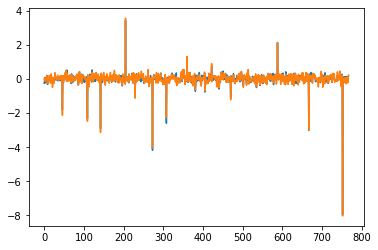

In [13]:
#DistilBERT word Embeddings
from transformers import *
input_word1='playing'
input_word2='photography'
#Retrieve the DistilBERT word embeddings
cls_token1=get_embeddings(TFDistilBertModel,BertTokenizer,'distilbert-base-uncased',input_word1)
cls_token2=get_embeddings(TFDistilBertModel,BertTokenizer,'distilbert-base-uncased',input_word2)

#Measure the distance between the embeddings
distance=1-cosine(cls_token1[0],cls_token2[0])
print('Word Pair Similarity',distance)
#Plot the distance
plt.plot(cls_token1[0])
plt.plot(cls_token2[0])



## XL NET Embeddings

[This paper](https://arxiv.org/abs/1906.08237) provides an important outline of the modifications made on top of BERT for producing XLNet. It applies an autoregressive language model and has the 2 most important points:

- Enables learning bidirectional contexts by maximizing the expected likelihood over all permutations of the factorization order
- Overcomes the limitations of BERT thanks to its autoregressive formulation.
- It is a permutation language model and a pictorial representation can be :

<img src="https://zdnet2.cbsistatic.com/hub/i/r/2019/06/21/2a4e6548-9dee-491d-b638-8cfae9bbb2fe/resize/1200x900/ab279544c2631111754a357ada50ef29/google-xlnet-architecture-2019.png">



Here we will be using an alternate strategy for building the word embeddings
We will be using the Feature Extraction Pipeline from Huggingface- just to show that there are more than one ways of retrieving the embeddings.

Downloading:   0%|          | 0.00/760 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/565M [00:00<?, ?B/s]

Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetModel: ['lm_loss']
- This IS expected if you are initializing TFXLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLNetModel were initialized from the model checkpoint at xlnet-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLNetModel for predictions without further training.


Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetModel: ['lm_loss']
- This IS expected if you are initializing TFXLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLNetModel were initialized from the model checkpoint at xlnet-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLNetModel for predictions without further training.


Word Pair Similarity 0.9300530817551897


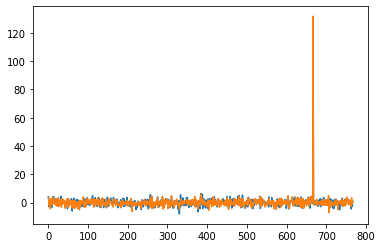

In [14]:
#XLNET word Embeddings
#Using the Feature Extraction pipeline from Huggingface

from transformers import AutoTokenizer, pipeline
from scipy.spatial.distance import cosine
def transformer_embedding(model_name,name,inp):

    model = model_name.from_pretrained(name)
    tokenizer = AutoTokenizer.from_pretrained(name)
    pipe = pipeline('feature-extraction', model=model, 
                tokenizer=tokenizer)
    features = pipe(inp)
    features = np.squeeze(features)
    return features

input_word1='playing'
input_word2='photography'
#Retrieve the XLNET word embeddings
cls_token1=transformer_embedding(TFXLNetModel,'xlnet-base-cased',input_word1)
cls_token2=transformer_embedding(TFXLNetModel,'xlnet-base-cased',input_word2)

#Measure the distance between the embeddings
distance=1-cosine(cls_token1[0],cls_token2[0])
print('Word Pair Similarity',distance)
#Plot the distance
plt.plot(cls_token1[0])
plt.plot(cls_token2[0])



## Exploring Generative Transformers - GPT2


<img src="http://jalammar.github.io/images/gpt2/openAI-GPT-2-3.png">


It is a [robust model](https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf). GPT-2 is a large transformer-based language model with 1.5 billion parameters, trained on a dataset[1] of 8 million web pages. GPT-2 is trained with a simple objective: predict the next word, given all of the previous words within some text. The diversity of the dataset causes this simple goal to contain naturally occurring demonstrations of many tasks across diverse domains. GPT-2 is a direct scale-up of GPT, with more than 10X the parameters and trained on more than 10X the amount of data.Some important aspects:

GPT-2 is a model with absolute position embeddings so it’s usually advised to pad the inputs on the right rather than the left.

GPT-2 was trained with a causal language modeling (CLM) objective and is therefore powerful at predicting the next token in a sequence. Leveraging this feature allows GPT-2 to generate syntactically coherent text as it can be observed in the run_generation.py example script.

GPT-2 is a decoder Transformer model. Generally most transformers are encoder-decoders, but in the case of GPT-2 this is a decoder-only model. GPT-2 has stacks of decoder cells on top of one another, and inside each decoder block resides -Masked Self Attention and FFNN (Dense) Networks.


<img src="http://jalammar.github.io/images/gpt2/gpt2-self-attention-qkv-1-2.png">



## Masked Self Attention


This is the core part which separated GPT from BERT variants:


<img src="http://jalammar.github.io/images/gpt2/self-attention-and-masked-self-attention.png">


More details can be found here:

- [NLP](https://www.kaggle.com/colearninglounge/nlp-end-to-end-cll-nlp-workshop-2)
- [NLP](https://www.kaggle.com/abhilash1910/nlp-workshop-2-ml-india)
- [Jay's blog](http://jalammar.github.io/illustrated-gpt2/)

Downloading:   0%|          | 0.00/656 [00:00<?, ?B/s]

You are using a model of type openai-gpt to instantiate a model of type gpt2. This is not supported for all configurations of models and can yield errors.


Downloading:   0%|          | 0.00/466M [00:00<?, ?B/s]

Some layers from the model checkpoint at openai-gpt were not used when initializing TFGPT2Model: ['transformer/tokens_embed/weight:0', 'transformer/positions_embed/embeddings:0']
- This IS expected if you are initializing TFGPT2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFGPT2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFGPT2Model were not initialized from the model checkpoint at openai-gpt and are newly initialized: ['transformer/ln_f/gamma:0', 'transformer/wpe/embeddings:0', 'transformer/ln_f/beta:0', 'transformer/wte/weight:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/816k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/458k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

You are using a model of type openai-gpt to instantiate a model of type gpt2. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at openai-gpt were not used when initializing TFGPT2Model: ['transformer/tokens_embed/weight:0', 'transformer/positions_embed/embeddings:0']
- This IS expected if you are initializing TFGPT2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFGPT2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFGPT2Model were not initialized from the model checkpoint at openai-gpt and are newly initialized: ['transformer/ln_f/gamma:0', 'transformer/wpe/embeddings:0', 'transformer/ln_f/beta:0', 'trans

Word Pair Similarity 0.969143882137595


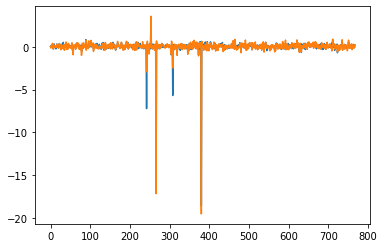

In [15]:
#For GPT variants, it is important to know that these use 'PAD' tokens additionally and are used from left to right.
#Unlike BERT variants which are bidirectional in nature, GPT is more of a left to right tokenizer due to the Masking of Attention.

def transformer_gpt_embedding(model_name,name,inp):

    model = model_name.from_pretrained(name)
    tokenizer = AutoTokenizer.from_pretrained(name)
    tokenizer.pad_token = "[PAD]"
    pipe = pipeline('feature-extraction', model=model, 
                tokenizer=tokenizer)
    features = pipe(inp)
    features = np.squeeze(features)
    return features

input_word1='playing'
input_word2='photography'
#Retrieve the GPT-2 word embeddings
cls_token1=transformer_gpt_embedding(TFGPT2Model,'openai-gpt',input_word1)
cls_token2=transformer_gpt_embedding(TFGPT2Model,'openai-gpt',input_word2)

#Measure the distance between the embeddings
distance=1-cosine(cls_token1,cls_token2)
print('Word Pair Similarity',distance)
#Plot the distance
plt.plot(cls_token1)
plt.plot(cls_token2)



## Any Transformer Model can be used for our Classification Use case


In this case, we will be creating a function to create an embedding matrix (instead of word vectors) , very much like Glove. Important point is to remember that, this code is compatible with any BERT variant transformers and also the embedding dimensions should be compatible with the Transformer size mentioned in the [pretrained section](https://huggingface.co/transformers/pretrained_models.html)

The steps are straightforward, and it is as follows:

- Batch tokenize the input features
- Once these have been tokenized (with Transformer tokenizers) , we will be applying certain masks
- Padding the tokenized text 
- Then we have to apply an attention mask
- The attention mask signifies that we have to segregate the input features in 0s and 1s.
- Extract the last hidden outputs 

Using these embeddings, we can plug them into our standard neural network architecture (along with Attention).

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'vocab_transform', 'activation_13', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
Token indices sequence length is longer than the specified maximum seque

(6079, 768)


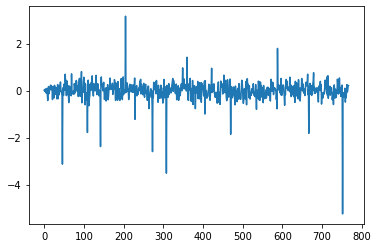

In [18]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]
        
        
def fetch_vectors(string_list,pretrained_model,batch_size=64):
    # inspired by https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/
    tokenizer = AutoTokenizer.from_pretrained(pretrained_model)
    model = transformers.TFDistilBertModel.from_pretrained(pretrained_model)
    
    fin_features = []
    for data in chunks(string_list, batch_size):
        tokenized = []
        for x in data:
            x = " ".join(x.strip().split()[:300])
            tok = tokenizer.encode(x, add_special_tokens=True)
            tokenized.append(tok[:512])

        max_len = 512
        #bert variants have attention id, input id and segment id
        padded = np.array([i + [0] * (max_len - len(i)) for i in tokenized])
        #This is the attention mask
        attention_mask = np.where(padded != 0, 1, 0)
        input_ids = tf.convert_to_tensor(padded)
        attention_mask = tf.convert_to_tensor(attention_mask)
        #Extract the last hidden states.
        last_hidden_states = model(input_ids, attention_mask=attention_mask)

        features = last_hidden_states[0][:, 0, :].cpu().numpy()
        fin_features.append(features)

    fin_features = np.vstack(fin_features)
    return fin_features

distilbert_embeddings = fetch_vectors(train_df.question_body.values,'distilbert-base-uncased')
print(distilbert_embeddings.shape)
plt.plot(distilbert_embeddings[0])

## Apply the Older GRU with Self Attention Model on DistilBert Embeddings

Now, we can apply the GRU model which we created on the DistilBert Embeddings and evaluate the classification performance.Important point to note, that here the dimension is 768, and the 6079 includes the number of features (max_features). We have to replace those variables accordingly.

<img src="http://jalammar.github.io/images/distilBERT/bert-model-input-output-1.png">

In [19]:
#Important parameters when using without pretrained embeddings-Distilbert and Self Attention on GRU
maxlen=1000
#Obsserve the max_features which is -> distilbert_embeddings.shape[0]
max_features=6079
#Observe the embed_size->distilbert_embeddings.shape[1]
embed_size=768


#Desing a simple model
#Layers:
#1.Input
#2.Embedding
#3.Simple LSTM- With Bidirectionality to increase efficiency(Distilbert)
#4.Attention- Applying 1D attention-Self Attention
#5.GlobalMaxPooling (optional)
#6.Dense Layer with Relu activation
#7.Final Dense layer containing the input units = (no of unique labels in the corpus).In this case 5.

inp=Input(shape=(maxlen,))
z=Embedding(max_features,embed_size,weights=[distilbert_embeddings])(inp)
gru_cell,_=(GRU(60,return_state='True'))(z)
self_attention=Scaled_Dot_Product_Self_Attention_1D(60)
_,attention_weights_h=self_attention(gru_cell,64)
print('attention_weights',attention_weights_h)
z=attention_weights_h
# z=GlobalMaxPool1D()(final_attention_weights)
z=Dense(16,activation='relu')(z)
z=Dense(5,activation='softmax')(z)
model=Model(inputs=inp,outputs=z)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
plot_model(
    model,
    to_file="Simple_GRU_Self_attention_Distilbert.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

#Split the training and test datasets
train_y=labels
train_x,test_x,train_y,test_y=train_test_split(train_df['question_body'],train_y,test_size=0.2,random_state=42)
val_x=test_x

#Tokenizing steps- must be remembered
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_x))
train_x=tokenizer.texts_to_sequences(train_x)
val_x=tokenizer.texts_to_sequences(val_x)

#Pad the sequence- To allow same length for all vectorized words
train_x=pad_sequences(train_x,maxlen=maxlen)
val_x=pad_sequences(val_x,maxlen=maxlen)
val_y=test_y
print("Padded and Tokenized Training Sequence".format(),train_x.shape)
print("Target Values Shape".format(),train_y.shape)
print("Padded and Tokenized Training Sequence".format(),val_x.shape)
print("Target Values Shape".format(),val_y.shape)

#Run the model with the dataset with 128 batch size ,10 epochs and validation data.
model.fit(train_x,train_y,batch_size=128,epochs=10,verbose=2,validation_data=(val_x,val_y))


attention_weights KerasTensor(type_spec=TensorSpec(shape=(None, 60), dtype=tf.float32, name=None), name='scaled__dot__product__self__attention_1d_1/Softmax:0', description="created by layer 'scaled__dot__product__self__attention_1d_1'")
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1000)]            0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 1000, 768)         4668672   
_________________________________________________________________
gru (GRU)                    [(None, 60), (None, 60)]  149400    
_________________________________________________________________
scaled__dot__product__self__ ((None,), (None, 60))     7320      
_________________________________________________________________
dense_17 (Dense)             (None, 16)                976       
____________________

# End of the Previous Notebook Content

This completes the basic part of using Huggingface transformers which we used to create the transformer embeddings and followed the previous notebook. We included attention and BERT based/GPT based embedding techniques, and now we will be looking into some advanced inference techniques. Also for training on Cloud TPU ,please follow this [notebook](https://www.kaggle.com/abhilash1910/nlp-workshop-2-ml-india). Most of the notebooks are on the same problem statement and can be used as and when required.

# Creating and evaluating Bert based Finetuning

This is a method for using pretrained BERT embeddings and passing it through a series of Dense networks for creating a finetuned BERT/BERT based model for classification.

The steps followed in this part include:
- Instantiating a bert model from config files or as a pretrained model
- Converting the inputs into and encoded form by using bert tokenizers
- The 3 important aspects are input ids, input masks/attention masks and input segments
- The question and answer pair are simultaneously encoded 
- Building a keras model using the BERT embeddings and extracting the last layers
- Fitting the model and evaluating the loss


In [20]:
from transformers import *
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import numpy as np
from tqdm import tqdm

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

max_len = 512

df_train = pd.read_csv('../input/google-quest-challenge/train.csv')
df_test = pd.read_csv('../input/google-quest-challenge/test.csv')
df_sub = pd.read_csv('../input/google-quest-challenge/sample_submission.csv')
# print('train shape =', df_train.shape)
# print('test shape =', df_test.shape)
output_categories = list(df_train.columns[11:])
input_categories = list(df_train.columns[[1,2,5]])


def _convert_to_transformer_inputs(title, question, answer, tokenizer, max_sequence_length):
    """Converts tokenized input to ids, masks and segments for transformer (including bert)"""
    
    def encode_qa(str1, str2, truncation_strategy, length):

        inputs = tokenizer.encode_plus(str1, str2,
            add_special_tokens=True,
            max_length=length,
            truncation_strategy=truncation_strategy)
        
        input_ids =  inputs["input_ids"]
        input_masks = [1] * len(input_ids)
        input_segments = inputs["token_type_ids"]
        padding_length = length - len(input_ids)
        padding_id = tokenizer.pad_token_id
        input_ids = input_ids + ([padding_id] * padding_length)
        input_masks = input_masks + ([0] * padding_length)
        input_segments = input_segments + ([0] * padding_length)
        
        return [input_ids, input_masks, input_segments]
    
    input_ids_q, input_masks_q, input_segments_q = encode_qa(
        title + ' ' + question, None, 'longest_first', max_sequence_length)
    
    input_ids_a, input_masks_a, input_segments_a = encode_qa(
        answer, None, 'longest_first', max_sequence_length)
    
    return [input_ids_q, input_masks_q, input_segments_q,
            input_ids_a, input_masks_a, input_segments_a]

def compute_input_arrays(df, columns, tokenizer, max_sequence_length):
    input_ids_q, input_masks_q, input_segments_q = [], [], []
    input_ids_a, input_masks_a, input_segments_a = [], [], []
    for _, instance in tqdm(df[columns].iterrows()):
        t, q, a = instance.question_title, instance.question_body, instance.answer

        ids_q, masks_q, segments_q, ids_a, masks_a, segments_a =_convert_to_transformer_inputs(t, q, a, tokenizer, max_sequence_length)
        
        input_ids_q.append(ids_q)
        input_masks_q.append(masks_q)
        input_segments_q.append(segments_q)

        input_ids_a.append(ids_a)
        input_masks_a.append(masks_a)
        input_segments_a.append(segments_a)
        
    return [np.asarray(input_ids_q, dtype=np.int32), 
            np.asarray(input_masks_q, dtype=np.int32), 
            np.asarray(input_segments_q, dtype=np.int32),
            np.asarray(input_ids_a, dtype=np.int32), 
            np.asarray(input_masks_a, dtype=np.int32), 
            np.asarray(input_segments_a, dtype=np.int32)]

def compute_output_arrays(df, columns):
    return np.asarray(df[columns])

def create_model(model_name):
    q_id = tf.keras.layers.Input((max_len,), dtype=tf.int32)
    a_id = tf.keras.layers.Input((max_len,), dtype=tf.int32)
    
    q_mask = tf.keras.layers.Input((max_len,), dtype=tf.int32)
    a_mask = tf.keras.layers.Input((max_len,), dtype=tf.int32)
    
    q_atn = tf.keras.layers.Input((max_len,), dtype=tf.int32)
    a_atn = tf.keras.layers.Input((max_len,), dtype=tf.int32)
    
#     config = BertConfig() # print(config) to see settings
#     config.output_hidden_states = False # Set to True to obtain hidden states
    
    bert_model = TFBertModel.from_pretrained(model_name)
    
    #  obtain hidden states via bert_model(...)[-1]
    #Second way of extracting embeddings from bert
    q_embedding = bert_model(q_id, attention_mask=q_mask, token_type_ids=q_atn)[0]
    a_embedding = bert_model(a_id, attention_mask=a_mask, token_type_ids=a_atn)[0]
#     q_hidden_state=bert_model(q_id, attention_mask=q_mask, token_type_ids=q_atn)[-1]
#     a_hidden_state=bert_model(a_id, attention_mask=a_mask, token_type_ids=a_atn)[-1]
    q = tf.keras.layers.GlobalAveragePooling1D()(q_embedding)
    a = tf.keras.layers.GlobalAveragePooling1D()(a_embedding)
    x = tf.keras.layers.Concatenate()([q, a])
#     x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(30, activation='softmax')(x)

    model = tf.keras.models.Model(inputs=[q_id, q_mask, q_atn, a_id, a_mask, a_atn,], outputs=x)
    return model

df_train=df_train[:1000]
outputs = compute_output_arrays(df_train, output_categories)
inputs = compute_input_arrays(df_train, input_categories, tokenizer, max_len)
test_inputs = compute_input_arrays(df_test, input_categories, tokenizer, max_len)
model_name='bert-base-uncased'
model = create_model(model_name)
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(inputs, outputs, epochs=3, batch_size=6)

0it [00:00, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
1000it [00:09, 100.25it/s]
476it [00:04, 100.23it/s]
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertFo

Epoch 1/3
167/167 [==============================] - 168s 842ms/step - loss: 0.4928
Epoch 2/3
167/167 [==============================] - 140s 841ms/step - loss: 0.4327
Epoch 3/3
167/167 [==============================] - 140s 841ms/step - loss: 0.4339


# Inference on BERT/GPT/T5/Electra based Transformers for Downstream task

In this scope we will be seeing how to create inference logics for some of the popular downstream tasks and optimize the model performance . These include question answering ,token classification, summarization to name a few. The methodology followed in this case should be similar which includes tokenization , followed by running the forward pass of the model and also detokenization of the model outputs.

## Question Answering Inference

The first topic includes question answer based inference, where the tokens are seoarated into questions and answers for evaluation. The tokenization is also done separately first  on the [CLS] based tokens for BERT based models and the answers are delimited by [SEP ] tokens. The following figure illustrates this:

<img src="http://www.mccormickml.com/assets/BERT/SQuAD/input_formatting.png">

For infering the answers, there are different ways . The most popular way is to use the transformer pipeline for the "question answering" task as shown below.

In [21]:
from transformers import AutoModelForQuestionAnswering,AutoTokenizer,pipeline
model=AutoModelForQuestionAnswering.from_pretrained('abhilash1910/distilbert-squadv1')
tokenizer=AutoTokenizer.from_pretrained('abhilash1910/distilbert-squadv1')
nlp_QA=pipeline('question-answering',model=model,tokenizer=tokenizer)
QA_inp={
    'question': 'How many parameters does Bert large have?',
    'context': 'Bert large is really big... it has 24 layers, for a total of 340M parameters.Altogether it is 1.34 GB so expect it to take a couple minutes to download to your Colab instance.'
}
result=nlp_QA(QA_inp)
result

Downloading:   0%|          | 0.00/518 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/261M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/257 [00:00<?, ?B/s]

{'score': 0.10032137483358383, 'start': 35, 'end': 44, 'answer': '24 layers'}

## QA Inference using Bert /Bert based models

The steps are as follows:
1. Tokenize the question and context tags by CLS and SEP enabled tokenizers
2. Pass it through the model 
3. Detokenize the model outputs and select the tokens having the maximum scores

We will be using torch for inference. In the first case, it is important to note that tokenizer.encode_plus uses some arguements which include the input_ids, attention masks and segment ids /token_type_ids . We can also see the input ids by converting them to a list. Since we will only be using the forward pass of the Bert base transformer for QA inference, it is important to write ```torch.no_grad()``` to speed up performance for larger inference datasets. The outputs of the model contain scores in the form of tensors. The QA pipeline output can be used to segment the range containing the maximum scores between the start and the end tokens. The rest of the part involves detokenization of the tokens in the specified maximum value range. The answer is then received by using ```tokenizer.convert_tokens_to_string``` method. This is a simpler way to write a QA pipeline using torch.

Resources:

- [HF](https://huggingface.co/transformers/main_classes/pipelines.html#transformers.QuestionAnsweringPipeline)
- [Blog](https://colab.research.google.com/github/NVIDIA/DeepLearningExamples/blob/master/TensorFlow/LanguageModeling/BERT/notebooks/bert_squad_tf_inference_colab.ipynb)
- [Blog](https://mccormickml.com/2020/03/10/question-answering-with-a-fine-tuned-BERT/#:~:text=Super%20Bowl%2050.-,BERT%20Input%20Format,question%20from%20the%20reference%20text.)
- [QApipeline](https://huggingface.co/transformers/_modules/transformers/pipelines/question_answering.html#QuestionAnsweringPipeline)

<img src="http://www.mccormickml.com/assets/BERT/SQuAD/start_token_classification.png">

In [28]:
import torch
import numpy as np
model=AutoModelForQuestionAnswering.from_pretrained('huggingface/prunebert-base-uncased-6-finepruned-w-distil-squad')
tokenizer=AutoTokenizer.from_pretrained('huggingface/prunebert-base-uncased-6-finepruned-w-distil-squad')
def inference(question,context):
    question_first=bool(tokenizer.padding_side=='right')
    max_answer_len=5
    encoded_text=tokenizer.encode_plus(question,context,padding='longest',
                    truncation="longest_first" ,
                    max_length=512,
                    stride=30,
                    return_tensors="pt",
                    return_token_type_ids=False,
                    return_overflowing_tokens=False,
                    return_offsets_mapping=False,
                    return_special_tokens_mask=False)
    input_ids=encoded_text['input_ids'].tolist()[0]
    #print(input_ids)
    tokens=tokenizer.convert_ids_to_tokens(input_ids)
    with torch.no_grad():
        outputs=model(**encoded_text)
#     answer_st=outputs.start_logits
#     answer_et=outputs.end_logits
    start_,end_=outputs[:2]
    answer_start=torch.argmax(start_)
    answer_end=torch.argmax(end_)+1
    answer=tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))
    print(answer)
    
question= 'How many parameters does Bert large have?'
context= 'Bert is really large...it has 24 layers, for a total of 340M parameters.Altogether it is 1.34 GB so expect it to take a couple minutes to download to your Colab instance.'    
inference(question,context)

Downloading:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

340m parameters. altogether it is 1. 34 gb


## Summarization using T5 Encoder-Decoder Transformer

In this case, we are using a Enc-Dec T5 transformer for summarization task. The steps involved here include:

- Tokenization of the input corpus /context which needs to be summarized
- Since the summarization/text2textgeneration/translation uses the same base class in huggingface it is important to mention the tasks ```summarize:``` inside the tokenizer arguements
- Perform checks to see if the model configuration values of the min and lax length are less than the tokenized input
- Perform inference using the torch.no_grad() call
- Since this is a generation task and all generative decoder models like GPT and enc-dec models like BART/T5/Mariam/electra can be used for this task
- There are different ways to generate and this is performed using ```model.generate()``` method which specifies the search type used for generating the summary
- In this case we are using the beam search mechanism with early stopping set to True to prevent overtraining
- The next part invoves using ```tokenizer.decode``` to abstract the first summarized output (torch tensor) from the model.Some additional arguements like ```skip_special_tokens``` are set as True.
- The final summarized text is received at the output.

<img src="https://iq.opengenus.org/content/images/2020/01/pic2.png">

Resources:

- [Blog](https://towardsdatascience.com/simple-abstractive-text-summarization-with-pretrained-t5-text-to-text-transfer-transformer-10f6d602c426)
- [Blog](https://betterprogramming.pub/how-to-summarize-text-with-googles-t5-4dd1ae6238b6)
- [Blog](https://towardsdatascience.com/conditional-text-generation-by-fine-tuning-gpt-2-11c1a9fc639d)
- [HF](https://huggingface.co/transformers/_modules/transformers/pipelines/text2text_generation.html#Text2TextGenerationPipeline)

In [23]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config
import torch
model=T5ForConditionalGeneration.from_pretrained('t5-small') #also autotokenizer/automodel
tokenizer=T5Tokenizer.from_pretrained('t5-small')
def summarize_infer(context):
    encoded=tokenizer.encode("summarize: "+context,max_length=512,return_tensors='pt',truncation='longest_first')
    input_length=encoded.shape[-1]
    print(input_length)
    min_length=model.config.min_length
    max_length=model.config.max_length
    print(min_length,max_length)
    if(min_length//2 > input_length):
        model.config.summarization.min_length=input_length
    if(max_length>input_length):
        model.config.max_length=input_length
    print('Model Configuration',model.config)   
    with torch.no_grad():
        summarize=model.generate(encoded,model.config.max_length+50,model.config.min_length,num_beams=4,early_stopping=True)
    #print('summarized tokens',summarize)
    summarized_text=tokenizer.decode(
                    summarize[0],
                    skip_special_tokens=True,
                    clean_up_tokenization_spaces=False,
                )
    print(summarized_text)
context="""
The US has "passed the peak" on new coronavirus cases, President Donald Trump said and predicted that some states would reopen this month.
The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, the highest for any country in the world.
At the daily White House coronavirus briefing on Wednesday, Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors.
"We'll be the comeback kids, all of us," he said. "We want to get our country back."
The Trump administration has previously fixed May 1 as a possible date to reopen the world's largest economy, but the president said some states may be able to return to normalcy earlier than that.
"""

summarization=summarize_infer(context)
print(summarization)

Downloading:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/242M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

173
0 20
Model Configuration T5Config {
  "_name_or_path": "t5-small",
  "architectures": [
    "T5WithLMHeadModel"
  ],
  "d_ff": 2048,
  "d_kv": 64,
  "d_model": 512,
  "decoder_start_token_id": 0,
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 6,
  "num_heads": 8,
  "num_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_size": 3,
      "num_beams": 4,
      "prefix": "summarize: "
    },
    "translation_en_to_de": {
      "early_stopping": true,
      "max_length": 300,
      "num_beams": 4,
      "prefix": "translate English to German: "
    },
    "translation_en_to_fr": {


## Text Generation using GPT2 Decoder Transformer

In this case we will be looking how to generate sequence of tokens using decoder GPT2 transformer. The steps are as follows:

- Since GPT2 uses special tokens , we are specifying them : bos_token,eos_token specify the beginning and end of sentence respectively. There are additional tokens which include unk (for unknows), pad(padding) and sep (separator) token as in BERT
- We first load the GPT2 transformer with the added special tokens parameter set in the tokenzier config.
- We load the GPT2 model from with the special tokens and also resize the models token embeddings using the ```model.resize_token_embedding`` method
- We first tokenize the data tor torch tensors and use the forward pass of  the GPT 2 model.
- In this case we are using the beam generation mechanism, and selecting the topk items from the resulting tensors. There is also a ```repitition_penalty``` applied which implies that the model will try to avoid predicting same tokens.
- The next part is decoding the tokens by using ```tokenizer.decode``` method as specified earlier and we get the final predicted generations

Some blogs related to beam search and topk sampling/nucleus sampling

- [Blog HF](https://huggingface.co/blog/how-to-generate)
- [Blog](https://snappishproductions.com/blog/2020/03/01/chapter-9.5-text-generation-with-gpt-2-and-only-pytorch.html.html)
- [HF](https://huggingface.co/transformers/_modules/transformers/pipelines/text_generation.html#TextGenerationPipeline)
- [HF](https://huggingface.co/transformers/main_classes/pipelines.html#textgenerationpipeline)

<img src="https://huggingface.co/blog/assets/02_how-to-generate/beam_search.png">

In [24]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel,AutoConfig,AutoTokenizer,AutoModelForPreTraining
SPECIAL_TOKENS = { "bos_token": "<|BOS|>",
                    "eos_token": "<|EOS|>",
                    "unk_token": "<|UNK|>",                    
                    "pad_token": "<|PAD|>",
                    "sep_token": "<|SEP|>"}
def generation_infer(context,special_tokens=None):
    tokenizer = GPT2Tokenizer.from_pretrained('gpt2') 
    if special_tokens:
        tokenizer.add_special_tokens(special_tokens)
    config=AutoConfig.from_pretrained('gpt2',bos_token_id=tokenizer.bos_token_id,eos_token_id=tokenizer.eos_token_id,
                                            sep_token_id=tokenizer.sep_token_id,
                                            pad_token_id=tokenizer.pad_token_id,
                                            output_hidden_states=False)
    model=GPT2LMHeadModel.from_pretrained('gpt2',config=config)
    if special_tokens:
        model.resize_token_embeddings(len(tokenizer))
    #context=SPECIAL_TOKENS['bos_token']+context+SPECIAL_TOKENS['eos_token']
    context =  context 
    generated=tokenizer.encode(context,return_tensors='pt')
    print(model.config)
    print(generated)
#     with torch.no_grad():
    sample_generations= model.generate(generated,do_sample=True,   
                                min_length=50, 
                                max_length=100,
                                num_beams=5,
                                top_k=30,                                 
                                top_p=0.7,        
                                temperature=0.9,
                                repetition_penalty=2.0,
                                num_return_sequences=10)
    generated_list=[]
    for i,generation in enumerate(sample_generations):
        text=tokenizer.decode(generation,skip_special_tokens=True)
        
        generate=context+text[len(context):]
        generated_list.append(generate)
    #generated_list.extend(generate)
    return generated_list

context="I enjoy walking with my cute dog at evening"
# generation_infer(context,SPECIAL_TOKENS)
generation_infer(context)
        
        
    
    
    

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "gradient_checkpointing": false,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "resid_pdrop": 0.1,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "transformers_version": "4.5.1",
  "use_cache": true,
  "vocab_size": 50257
}

tensor([[   40,  2883,  6155,   351,   616, 13779,  3290,   379,  6180]])


['I enjoy walking with my cute dog at evening. I like to have a good time with her and she\'s always there for me."\n\nShe added: "It\'s great to be able to go out and play with her, but it\'s also nice to have the opportunity to spend time with her.\n\n"I\'m really looking forward to seeing her again soon."',
 'I enjoy walking with my cute dog at evening, but I don\'t like to spend too much time with him.\n\n"I\'m not sure if it\'s because he\'s a bit of a jerk or if he just doesn\'t want to be around me anymore," she said.\n\nShe added: "It\'s kind of hard for me to talk to him about it."',
 'I enjoy walking with my cute dog at evening, but I don\'t like to be alone," she said.\n\n"I\'m not sure if it\'s because I\'m tired of being alone or if it\'s because I have a lot of other people around me."',
 'I enjoy walking with my cute dog at evening.\n\n"But I don\'t want to be alone," she said. "I just want to have a good time."\n\nShe\'s not the only one who feels that way.\n\nA recent 

## NER using Electra Encoder-Decoder Transformer

In this case, we will be seeing how to solve NER using electra transformer.Since this a little complicated we will be looking at some of the important points:

- The initial steps are similar as it involves tokenization of the input corpus and then running it through the model.The ```token_classification_infer``` method is the driver part of the program
- After the inference, there is an issue that subtokens may conflict with the NER tag such as 'Micro|Soft' and 'MicroSoft 'should ideally represent the same NER token. 
- To resolve this issue, we apply softmax on the model output tensors, and then detokenize the outputs to detect subwords and  determine the start and end of each entity in the corpus. This is done in the ```gather_pre_entities``` method
- The next step is aggregating subwords/subtokens into complete couterparts so that they can be represented as a single NER tag.The aggregation strategy is specified as None we return the entities. Else the aggregation happens by grouping subwords on their relative scores(average etc) for creating the tags. These are in the ```aggreagate_word`` method
- The final step is returning all the tokens combined together and removing [0] token since it can be ignored for NER.
- The resultant output provides the NER tags of all the items and their corresponding scores

<img src="https://www.researchgate.net/publication/347087784/figure/fig2/AS:1003243366780929@1616203266581/Illustration-of-BERT-models-for-A-NER-B-family-member-attributes-including-side-and.ppm">

Resource:

- [HF](https://huggingface.co/transformers/_modules/transformers/pipelines/question_answering.html#QuestionAnsweringPipeline)



In [25]:
from transformers import AutoTokenizer,AutoModelForTokenClassification
import torch
import numpy as np

tokenizer=AutoTokenizer.from_pretrained('dbmdz/electra-large-discriminator-finetuned-conll03-english')
model=AutoModelForTokenClassification.from_pretrained('dbmdz/electra-large-discriminator-finetuned-conll03-english')

class AggregationStrategy:
    """All the valid aggregation strategies for TokenClassificationPipeline"""

    NONE = "none"
    SIMPLE = "simple"
    FIRST = "first"
    AVERAGE = "average"
    MAX = "max"
def gather_pre_entities(sentence: str,input_ids: np.ndarray,scores: np.ndarray,offset_mapping,special_tokens_mask: np.ndarray) :
    """Fuse various numpy arrays into dicts with all the information needed for aggregation"""
    pre_entities = []
    for idx, token_scores in enumerate(scores):
        # Filter special_tokens, they should only occur
        # at the sentence boundaries since we're not encoding pairs of
        # sentences so we don't have to keep track of those.
        if special_tokens_mask[idx]:
            continue

        word = tokenizer.convert_ids_to_tokens(int(input_ids[idx]))
        if offset_mapping is not None:
            start_ind, end_ind = offset_mapping[idx]
            word_ref = sentence[start_ind:end_ind]
            is_subword = len(word_ref) != len(word)

            if int(input_ids[idx]) == tokenizer.unk_token_id:
                word = word_ref
                is_subword = False
        else:
            start_ind = None
            end_ind = None
            is_subword = False

        pre_entity = {
                "word": word,
                "scores": token_scores,
                "start": start_ind,
                "end": end_ind,
                "index": idx,
                "is_subword": is_subword,
            }
        pre_entities.append(pre_entity)
    return pre_entities


def group_sub_entities( entities) -> dict:
    """
    Group together the adjacent tokens with the same entity predicted.

    Args:
    entities (:obj:`dict`): The entities predicted by the pipeline.
    """
    # Get the first entity in the entity group
    entity = entities[0]["entity"].split("-")[-1]
    scores = np.nanmean([entity["score"] for entity in entities])
    tokens = [entity["word"] for entity in entities]

    entity_group = {
            "entity_group": entity,
            "score": np.mean(scores),
            "word": tokenizer.convert_tokens_to_string(tokens),
            "start": entities[0]["start"],
            "end": entities[-1]["end"],
    }
    return entity_group


def get_tag( entity_name: str) :
    if entity_name.startswith("B-"):
        bi = "B"
        tag = entity_name[2:]
    elif entity_name.startswith("I-"):
        bi = "I"
        tag = entity_name[2:]
    else:
        # It's not in B-, I- format
        bi = "B"
        tag = entity_name
    return bi, tag

def group_entities( entities) :
    """
    Find and group together the adjacent tokens with the same entity predicted.

    Args:
    entities (:obj:`dict`): The entities predicted by the pipeline.
    """

    entity_groups = []
    entity_group_disagg = []

    for entity in entities:
        if not entity_group_disagg:
            entity_group_disagg.append(entity)
            continue

    # If the current entity is similar and adjacent to the previous entity,
    # append it to the disaggregated entity group
    # The split is meant to account for the "B" and "I" prefixes
    # Shouldn't merge if both entities are B-type
    bi, tag = get_tag(entity["entity"])
    last_bi, last_tag = get_tag(entity_group_disagg[-1]["entity"])

    if tag == last_tag and bi != "B":
        # Modify subword type to be previous_type
        entity_group_disagg.append(entity)
    else:
        # If the current entity is different from the previous entity
        # aggregate the disaggregated entity group
        entity_groups.append(group_sub_entities(entity_group_disagg))
        entity_group_disagg = [entity]
    if entity_group_disagg:
        # it's the last entity, add it to the entity groups
        entity_groups.append(group_sub_entities(entity_group_disagg))

    return entity_groups

def aggregate(pre_entities, aggregation_strategy: AggregationStrategy):
    if aggregation_strategy in {AggregationStrategy.NONE, AggregationStrategy.SIMPLE}:
        entities = []
        for pre_entity in pre_entities:
            entity_idx = pre_entity["scores"].argmax()
            score = pre_entity["scores"][entity_idx]
            entity = {
                    "entity": model.config.id2label[entity_idx],
                    "score": score,
                    "index": pre_entity["index"],
                    "word": pre_entity["word"],
                    "start": pre_entity["start"],
                    "end": pre_entity["end"],
                }
            entities.append(entity)
    else:
        entities = aggregate_words(pre_entities, aggregation_strategy)

    if aggregation_strategy == AggregationStrategy.NONE:
        return entities
    return group_entities(entities)

def aggregate_word( entities, aggregation_strategy: AggregationStrategy) -> dict:
    word = tokenizer.convert_tokens_to_string([entity["word"] for entity in entities])
    if aggregation_strategy == AggregationStrategy.FIRST:
        scores = entities[0]["scores"]
        idx = scores.argmax()
        score = scores[idx]
        entity = model.config.id2label[idx]
    elif aggregation_strategy == AggregationStrategy.MAX:
        max_entity = max(entities, key=lambda entity: entity["scores"].max())
        scores = max_entity["scores"]
        idx = scores.argmax()
        score = scores[idx]
        entity = model.config.id2label[idx]
    elif aggregation_strategy == AggregationStrategy.AVERAGE:
        scores = np.stack([entity["scores"] for entity in entities])
        average_scores = np.nanmean(scores, axis=0)
        entity_idx = average_scores.argmax()
        entity = model.config.id2label[entity_idx]
        score = average_scores[entity_idx]
    else:
        raise ValueError("Invalid aggregation_strategy")
    new_entity = {
            "entity": entity,
            "score": score,
            "word": word,
            "start": entities[0]["start"],
            "end": entities[-1]["end"],
    }
    return new_entity

def token_classification_infer(_inputs):
    answers = []
    for i, sentence in enumerate(_inputs):
        
        tokens = tokenizer(
                sentence,
                return_attention_mask=False,
                return_tensors='pt',
                truncation="longest_first",
                return_special_tokens_mask=True,
                return_offsets_mapping=tokenizer.is_fast,
            )
        if tokenizer.is_fast:
            offset_mapping = tokens.pop("offset_mapping").cpu().numpy()[0]
        elif offset_mappings:
            offset_mapping = offset_mappings[i]
        else:
            offset_mapping = None

        special_tokens_mask = tokens.pop("special_tokens_mask").cpu().numpy()[0]

        with torch.no_grad():
            entities = model(**tokens)[0][0].cpu().numpy()
            input_ids = tokens["input_ids"].cpu().numpy()[0]

        scores = np.exp(entities) / np.exp(entities).sum(-1, keepdims=True)
        pre_entities = gather_pre_entities(sentence, input_ids, scores, offset_mapping, special_tokens_mask)
        grouped_entities = aggregate(pre_entities, aggregation_strategy=AggregationStrategy.NONE)
        # Filter anything that is in ignore_labels
        ignore_labels=["O"]
        entities = [entity for entity in grouped_entities if entity.get("entity", None) not in ignore_labels and entity.get("entity_group", None) not in ignore_labels ]
        answers.append(entities)

    if len(answers) == 1:
        return answers[0]
    return answers
sentences=["The UEFA Champions League (abbreviated as UCL) is an annual club football competition organised by the Union of European Football Associations (UEFA) and contested by top-division European clubs, deciding the competition winners through a round robin group stage to qualify for a double-legged knockout format, and a single leg final. It is one of the most prestigious football tournaments in the world and the most prestigious club competition in European football, played by the national league champions (and, for some nations, one or more runners-up) of their national associations."]
token_classification_infer(sentences)

Downloading:   0%|          | 0.00/828 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

[{'entity': 'I-MISC',
  'score': 0.997817,
  'index': 2,
  'word': 'uefa',
  'start': 4,
  'end': 8},
 {'entity': 'I-MISC',
  'score': 0.99747944,
  'index': 3,
  'word': 'champions',
  'start': 9,
  'end': 18},
 {'entity': 'I-MISC',
  'score': 0.9968585,
  'index': 4,
  'word': 'league',
  'start': 19,
  'end': 25},
 {'entity': 'I-MISC',
  'score': 0.9965017,
  'index': 8,
  'word': 'uc',
  'start': 42,
  'end': 44},
 {'entity': 'I-MISC',
  'score': 0.9971895,
  'index': 9,
  'word': '##l',
  'start': 44,
  'end': 45},
 {'entity': 'I-ORG',
  'score': 0.99676925,
  'index': 20,
  'word': 'union',
  'start': 103,
  'end': 108},
 {'entity': 'I-ORG',
  'score': 0.99702567,
  'index': 21,
  'word': 'of',
  'start': 109,
  'end': 111},
 {'entity': 'I-ORG',
  'score': 0.9893763,
  'index': 22,
  'word': 'european',
  'start': 112,
  'end': 120},
 {'entity': 'I-ORG',
  'score': 0.98847836,
  'index': 23,
  'word': 'football',
  'start': 121,
  'end': 129},
 {'entity': 'I-ORG',
  'score': 0.99

## Text Classification with Microsoft DialogRPT

In this case, we will be inferencing for simple text classification on a corpus, using the following steps:

- This is astraightforward method where we first tokenize the text using the arguements specified.
- We then pass the tensor through the model.
- The next step involves perfoming softmax of 1st and higher order depending on the number of labels we would like to have. If the model config has 1 label then a sigmoid (softmax order 1) is applied else traditional higher order softmax is applied.
- The next part involes associating the labels with the corresponding softmax scores. Since this is the backend of the Text Classification pipeline, the labels are defaulted from the model configurations.

<img src="https://i.morioh.com/200613/a1cacd81.jpg">

Resource:

- [Repository](https://i.morioh.com/200613/a1cacd81.jpg)
- [HF](https://huggingface.co/transformers/main_classes/pipelines.html#textclassificationpipeline)



In [29]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification
import torch
tokenizer=AutoTokenizer.from_pretrained('microsoft/DialogRPT-human-vs-rand')
model=AutoModelForSequenceClassification.from_pretrained('microsoft/DialogRPT-human-vs-rand')
def sequence_infer(context):
    tokens=tokenizer(context,return_attention_mask=False,
                return_tensors='pt',
                truncation="longest_first",
                return_special_tokens_mask=False)
    with torch.no_grad():
        outputs = model(**tokens)[0][0].cpu().numpy()
    

    if model.config.num_labels == 1:
        scores = 1.0 / (1.0 + np.exp(-outputs))
    else:
        scores = np.exp(outputs) / np.exp(outputs).sum(-1, keepdims=True)
        
    print(scores)
    return_all_scores=True
    
    return [
                {"label": model.config.id2label[item.argmax()], "score": item.max().item()} for item in scores
        ]
sequence_infer(["I like icecream"]*2)

Downloading:   0%|          | 0.00/812 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[0.31341147]


[{'label': 'LABEL_0', 'score': 0.3134114742279053}]

## Text To Text Paraphrasing/Generation with Encoder-Decoder T5

This example is similar to T5 for summarization since both of them use the same base class of ```text2textgeneration```:
- We tokenize the data using t5 small model and use the ```tokenizer.encode_plus``` module to abstract the input ids ,attention masks separately and pass them to the model
- In the model generation /inference stage , we have used separate options which include either beam searching the generations (slipgram,classical or returnseq) or by sampling(nucleus, tokp/topp).
- We then decode the abstractions of the model inference and use ```tokenizer.decode``` to decode the tokens.
- Ther resulting final array is then returned which contains the generated/paraphrased text

Resource:

- [HF](https://huggingface.co/transformers/_modules/transformers/pipelines/text_generation.html#TextGenerationPipeline)
- [HF](https://huggingface.co/transformers/main_classes/pipelines.html#text2textgenerationpipeline)
- [Blog](https://huggingface.co/blog/how-to-generate)

<img src="https://huggingface.co/blog/assets/02_how-to-generate/top_p_sampling.png">


In [30]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config
import torch
model=T5ForConditionalGeneration.from_pretrained('t5-small') #also autotokenizer/automodel
tokenizer=T5Tokenizer.from_pretrained('t5-small')
def beam_generations(model,input_ids,attention_masks,types):
    if (types=='skipgram'):
        beam_output_skipgram = model.generate(
                            input_ids=input_ids,attention_mask=attention_masks, 
                            max_length=256, 
                            num_beams=5, 
                            no_repeat_ngram_size=2, 
                            early_stopping=True
                                )
        return beam_output_skipgram
    elif(types=="classical"):
        beam_output_classic = model.generate(
                               input_ids=input_ids,attention_mask=attention_masks, 
                                max_length=256, 
                                num_beams=5,
                                early_stopping=True
                                )
        return beam_output_classic
    elif (types=="returnseq"):
        beam_output_returnseq = model.generate(
                                input_ids=input_ids,attention_mask=attention_masks, 
                                num_beams=50, 
                                no_repeat_ngram_size=2,
                                num_return_sequences=10,     
                                early_stopping=True
                                )
        return beam_output_returnseq
    
def sampling_generations(model,input_ids,attention_masks,types):
    if types=="nucleus":
        sample_nucleus = model.generate(
                        input_ids=input_ids,attention_mask=attention_masks,
                        do_sample=True, 
                        max_length=256, 
                        top_p=0.98, 
                        top_k=120
                    )
        return sample_nucleus
    elif types=="kpsampling":
        sample_outputskp = model.generate(
                        input_ids=input_ids,attention_mask=attention_masks,
                        do_sample=True, 
                        max_length=256, 
                        top_k=120, 
                        top_p=0.98, 
                        early_stopping=True,
                        num_return_sequences=10
        )
        return sample_outputskp
    

def paraphrase_infer(context):
    encoded=tokenizer.encode_plus(context,max_length=512,return_tensors='pt',truncation='longest_first',pad_to_max_length=True)
    input_length=encoded['input_ids'].shape[-1]
    print(input_length)
    min_length=model.config.min_length
    max_length=model.config.max_length
    print(min_length,max_length)
    if(min_length//2 > input_length):
        model.config.min_length=input_length
    if(max_length>input_length):
        model.config.max_length=input_length
    print('Model Configuration',model.config)   
    input_ids, attention_masks = encoded["input_ids"].to(torch.device('cpu')), encoded["attention_mask"].to(torch.device('cpu'))
    with torch.no_grad():
        paraphrase=beam_generations(model,input_ids,attention_masks,"skipgram")
    paraphrased=[]
    for beam_output in paraphrase:
        sent = tokenizer.decode(beam_output, skip_special_tokens=True,clean_up_tokenization_spaces=True)
        paraphrased.append(sent)
    return paraphrased
paraphrase_infer("Tha match was postponed due to bad weather")    

512
0 20
Model Configuration T5Config {
  "_name_or_path": "t5-small",
  "architectures": [
    "T5WithLMHeadModel"
  ],
  "d_ff": 2048,
  "d_kv": 64,
  "d_model": 512,
  "decoder_start_token_id": 0,
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 6,
  "num_heads": 8,
  "num_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_size": 3,
      "num_beams": 4,
      "prefix": "summarize: "
    },
    "translation_en_to_de": {
      "early_stopping": true,
      "max_length": 300,
      "num_beams": 4,
      "prefix": "translate English to German: "
    },
    "translation_en_to_fr": {


['Tha match was delayed due to bad weather.']

# Conclusion of Autoregressive Transformer Training and Inference Module

Here we have looked at some of the ways to build custom models and transform them to use Transformers. We have seen the Transformer embeddings which can be used for any downstream task such as classfication, and have also created finetuned model based on BERT base/ (or any bert variant) for the classification task. We have also looked into different attention strategies and transformer architecture in depth. Finally we have learnt how to use pretrained models and write custom inference modules for some of the most popular downstream tasks which include token classification (NER),QA,text classification,text2textparaphrasing, text generation, and summarization. For additional inference logics related to zero shot classification , it is present in the [Github gist](https://gist.github.com/abhilash1910/5e2bee7c3eccea843a8e9406b221d8f2) and also for other inference tasks based on transformers are present in my [Github](https://gist.github.com/abhilash1910). This concludes the session on Transformers.